In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
import zipfile


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_file_path = '/content/drive/MyDrive/SG_Materials/archive.zip'

In [4]:
extract_path = '/content/dataset'

In [5]:
os.makedirs(extract_path, exist_ok=True)

In [6]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/dataset


In [7]:
extracted_files = os.listdir(extract_path)

# Print the list of extracted files and directories
for file_name in extracted_files:
    print(file_name)

flower_images


In [8]:
base_dir = '/content/dataset/flower_images/'

img_size = 224
batch = 64

In [9]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [10]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
				activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

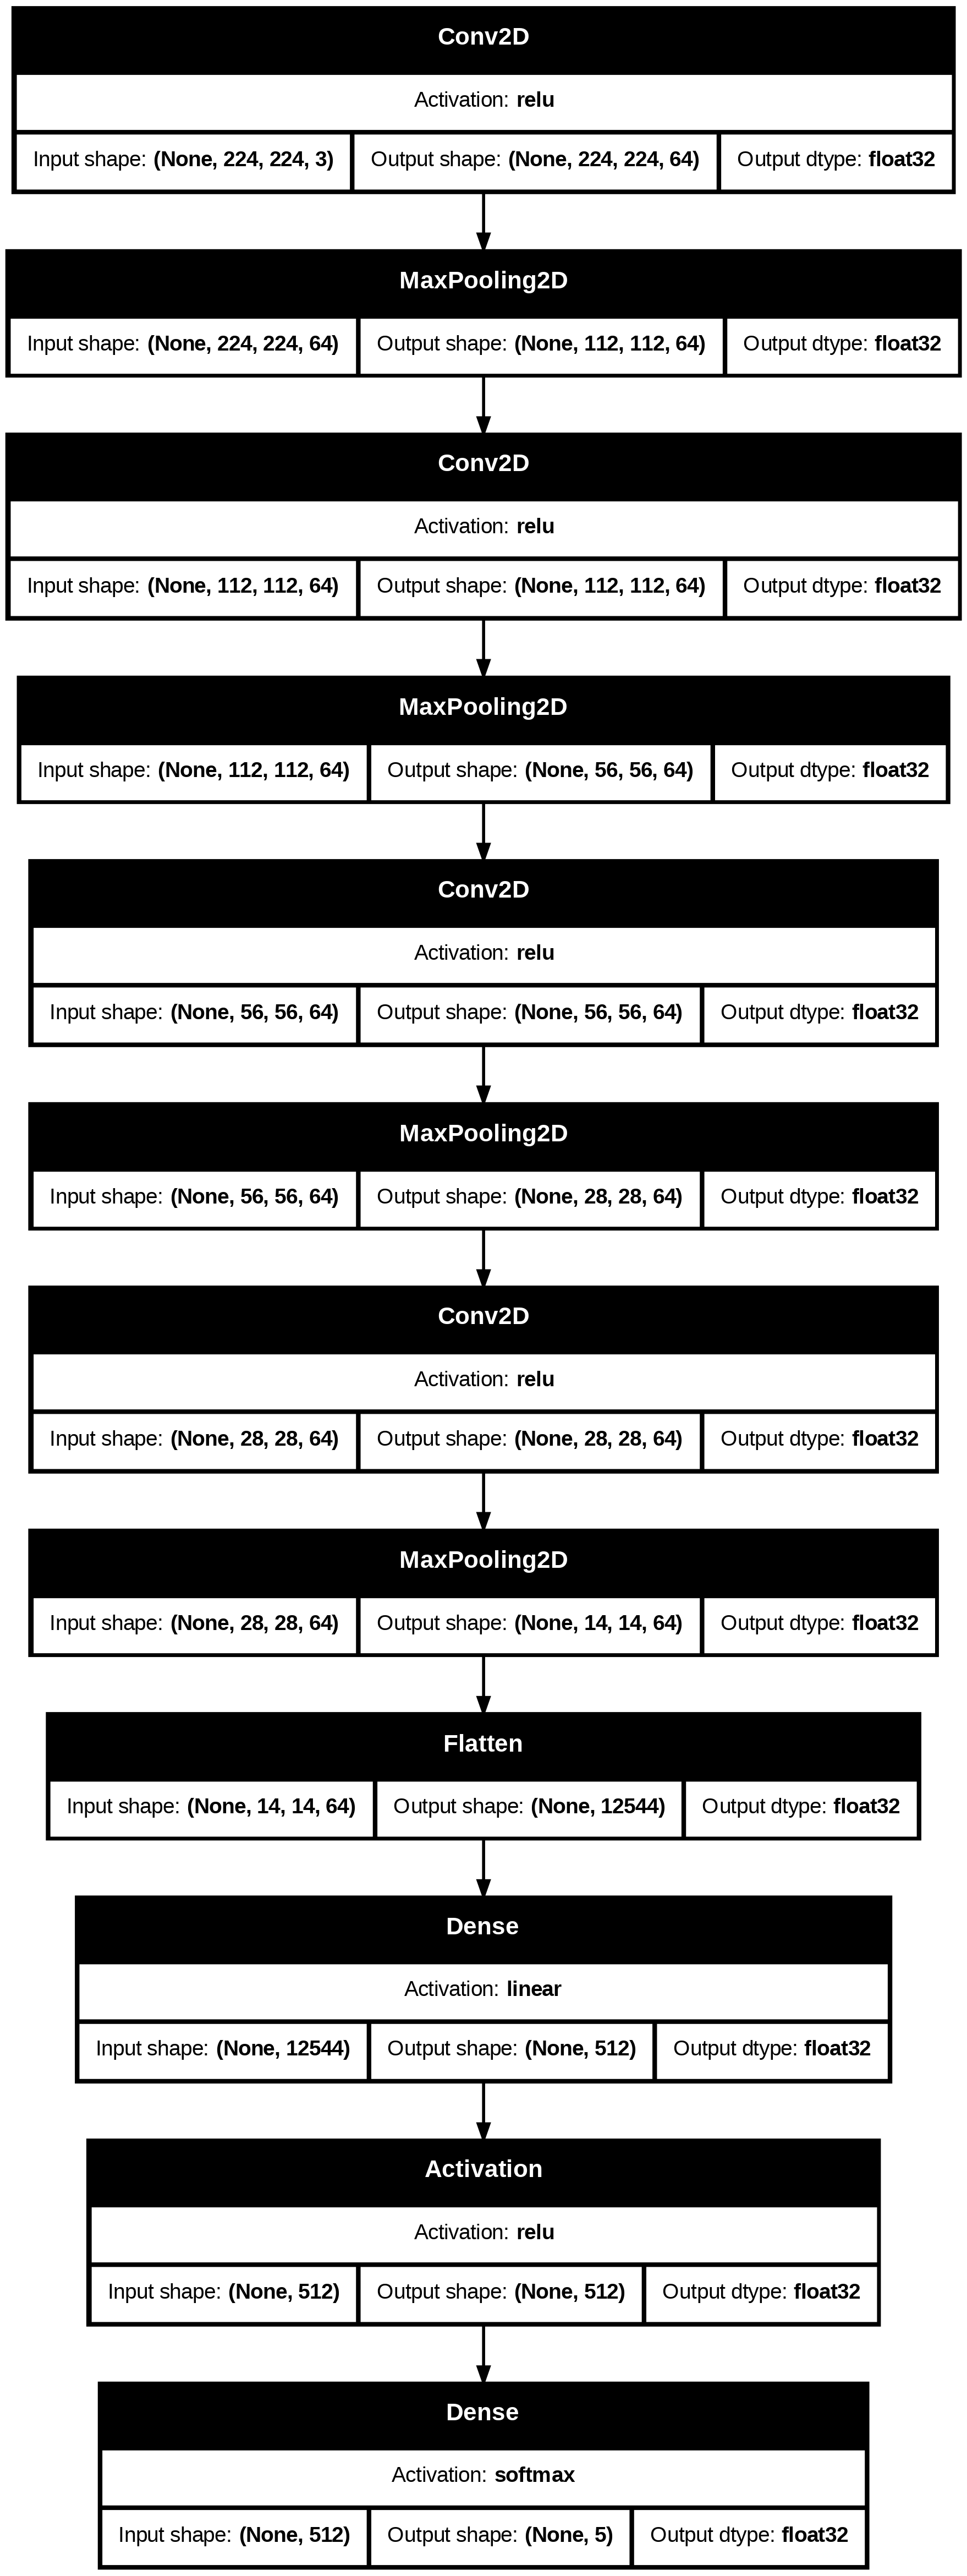

In [12]:
tf.keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3343 - loss: 1.5234 - val_accuracy: 0.4600 - val_loss: 1.2433
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 860ms/step - accuracy: 0.5382 - loss: 1.1247 - val_accuracy: 0.5510 - val_loss: 1.0568
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 940ms/step - accuracy: 0.5917 - loss: 1.0124 - val_accuracy: 0.6150 - val_loss: 0.9535
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 875ms/step - accuracy: 0.6354 - loss: 0.9163 - val_accuracy: 0.6020 - val_loss: 0.9910
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 839ms/step - accuracy: 0.6562 - loss: 0.8906 - val_accuracy: 0.6820 - val_loss: 0.8304
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 886ms/step - accuracy: 0.7033 - loss: 0.7635 - val_accuracy: 0.7070 - val_loss: 0.7901
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 846ms/step - accuracy: 0.7429 - loss: 0.6816 - val_accuracy: 0.7220 - val_loss: 0.7739
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 857ms/step - accuracy: 0.7536 - loss: 0.6298 - val_accuracy: 0.7510 -

In [15]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
train_datagen.class_indices

{'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1. 0. 0. 0. 0.]]
Daisy


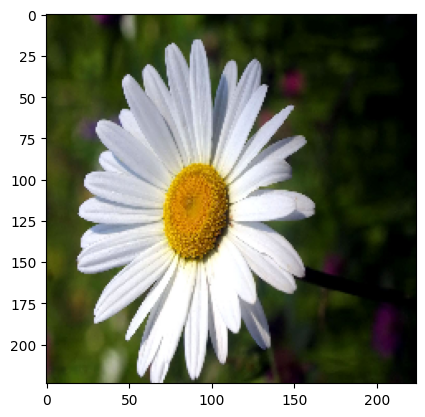

In [21]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('daisy.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0. 0. 0. 1. 0.]]
sunflower


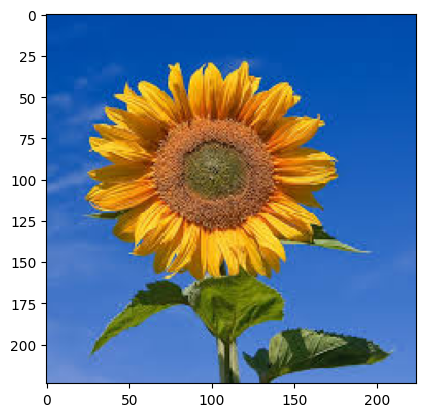

In [22]:
#Input image
test_image = image.load_img('img.jpeg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break
